## Vaccination Analysis


In [1]:
import pandas as pd
import random
import numpy as np
import copy
import networkx as nx
import matplotlib.pyplot as plt
import statistics
import tqdm

from matplotlib import font_manager
plt.style.use('seaborn-v0_8-bright')
hfont = {'fontname': 'Times'}
csfont = {'fontname':'Didot'}
font = font_manager.FontProperties(family='Times',
                                   style='normal', size=10)


20


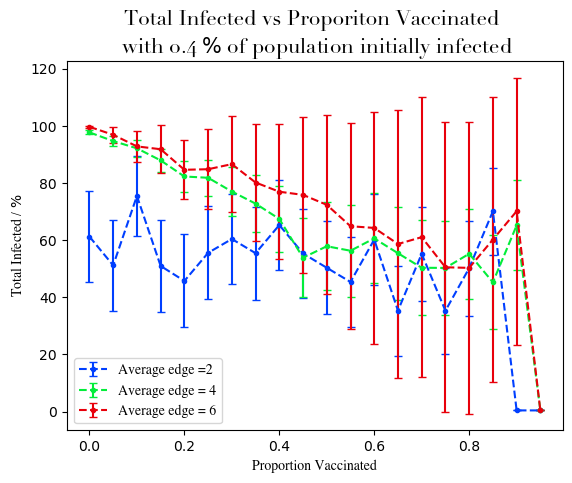

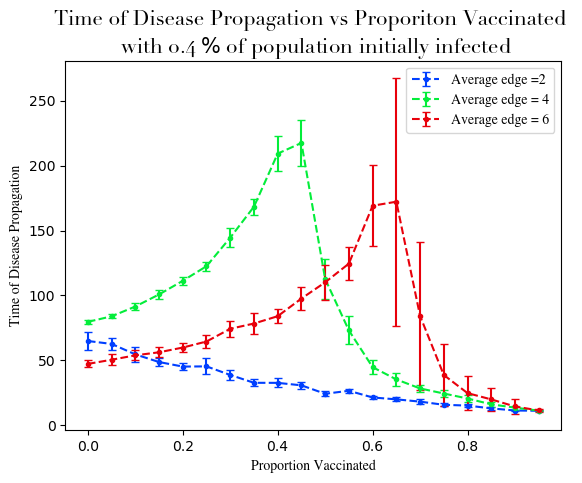

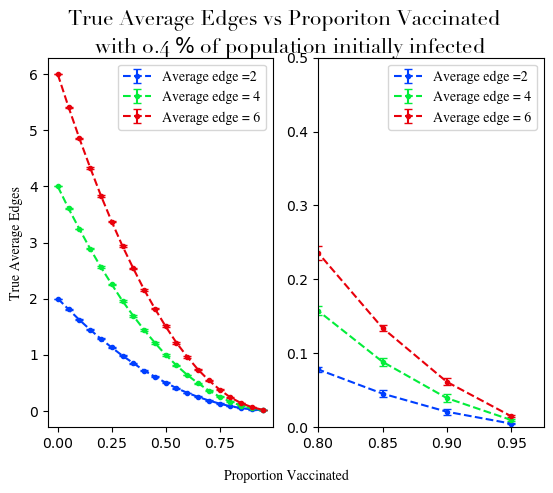

In [39]:

# Read in data
val_df = pd.read_csv('vaccineprop_e2e4_constants.csv')
meanCumulative_df = pd.read_csv('vaccineprop_e2e4_meanCumulative.csv')
meanRt_df = pd.read_csv('vaccineprop_e2e4_meanRt.csv')
stdCumulative_df = pd.read_csv('vaccineprop_e2e4_stdCumulative.csv')
stdRt_df = pd.read_csv('vaccineprop_e2e4_stdRt.csv')

val_df6 = pd.read_csv('vaccineprop_e6_constants.csv')
meanCumulative_df6 = pd.read_csv('vaccineprop_e6_meanCumulative.csv')
meanRt_d6f = pd.read_csv('vaccineprop_e6_meanRt.csv')
stdCumulative_df6 = pd.read_csv('vaccineprop_e6_stdCumulative.csv')
stdRt_df6 = pd.read_csv('vaccineprop_e6_stdRt.csv')

# avg edge = 2

ind = [i for i,v in enumerate(val_df['avg_edges']) if v == 2]
avgtimesteps_e2 = [val_df['avg_timesteps'][i] for i in ind]
stdtimesteps_e2 = [val_df['std_timesteps'][i] for i in ind]
avgedges_e2 = [val_df['Average Edges w Mit'][i] for i in ind]
stdedges_e2 = [val_df['Std Edges w Mit'][i] for i in ind]

mit = [0.05*i for i in range(len(avgedges_e2))]

cum_e2 = []
err_e2 = []
# Iterate over the columns in reverse order
for i in ind:
    for col in reversed(meanCumulative_df.columns):
        if pd.notna(meanCumulative_df.loc[i, col]):
            value = meanCumulative_df.loc[i, col]
            cum_e2.append(value)
            value = stdCumulative_df.loc[i, col]
            err_e2.append(value)
            break  # Exit the loop once a non-NaN value is foun
            
# avg edge = 3
ind = [i for i,v in enumerate(val_df['avg_edges']) if v == 3]
avgtimesteps_e3 = [val_df['avg_timesteps'][i] for i in ind]
stdtimesteps_e3 = [val_df['std_timesteps'][i] for i in ind]
avgedges_e3 = [val_df['Average Edges w Mit'][i] for i in ind]
stdedges_e3 = [val_df['Std Edges w Mit'][i] for i in ind]


cum_e3 = []
err_e3 = []
# Iterate over the columns in reverse order
for i in ind:
    for col in reversed(meanCumulative_df.columns):
        if pd.notna(meanCumulative_df.loc[i, col]):
            value = meanCumulative_df.loc[i, col]
            cum_e3.append(value)
            value = stdCumulative_df.loc[i, col]
            err_e3.append(value)
            break  # Exit the loop once a non-NaN value is foun
            
# Combining values
avgtime2 = [(avgtimesteps_e2[i]+avgtimesteps_e3[i])/2 for i in range(len(avgtimesteps_e2))]
N = len(stdtimesteps_e2)
stdtime2 = np.sqrt([(((stdtimesteps_e2[i])**2)/N)+(((stdtimesteps_e3[i])**2)/N) for i in range(len(avgtimesteps_e2))])
cumulative2 = [(cum_e2[i]+cum_e3[i])/2 for i in range(len(cum_e2))]
stdcumulative2 = np.sqrt([(((err_e2[i])**2)/N)+(((err_e3[i])**2)/N) for i in range(len(err_e2))])


# avg edge = 4
ind = [i for i,v in enumerate(val_df['avg_edges']) if v == 4]
avgtimesteps_e4 = [val_df['avg_timesteps'][i] for i in ind]
stdtimesteps_e4 = [val_df['std_timesteps'][i] for i in ind]
avgedges_e4 = [val_df['Average Edges w Mit'][i] for i in ind]
stdedges_e4 = [val_df['Std Edges w Mit'][i] for i in ind]

cum_e4 = []
err_e4 = []
# Iterate over the columns in reverse order
for i in ind:
    for col in reversed(meanCumulative_df.columns):
        if pd.notna(meanCumulative_df.loc[i, col]):
            value = meanCumulative_df.loc[i, col]
            cum_e4.append(value)
            value = stdCumulative_df.loc[i, col]
            err_e4.append(value)
            break  # Exit the loop once a non-NaN value is foun
            
# average edge = 5
ind = [i for i,v in enumerate(val_df['avg_edges']) if v == 5]
avgtimesteps_e5 = [val_df['avg_timesteps'][i] for i in ind]
stdtimesteps_e5 = [val_df['std_timesteps'][i] for i in ind]
avgedges_e5 = [val_df['Average Edges w Mit'][i] for i in ind]
stdedges_e5 = [val_df['Std Edges w Mit'][i] for i in ind]


cum_e5 = []
err_e5 = []
# Iterate over the columns in reverse order
for i in ind:
    for col in reversed(meanCumulative_df.columns):
        if pd.notna(meanCumulative_df.loc[i, col]):
            value = meanCumulative_df.loc[i, col]
            cum_e5.append(value)
            value = stdCumulative_df.loc[i, col]
            err_e5.append(value)
            break  # Exit the loop once a non-NaN value is foun

# Combining values
avgtime4 = [(avgtimesteps_e4[i]+avgtimesteps_e5[i])/2 for i in range(len(avgtimesteps_e4))]
N = len(stdtimesteps_e2)
stdtime4 = np.sqrt([(((stdtimesteps_e4[i])**2)/N)+(((stdtimesteps_e5[i])**2)/N) for i in range(len(avgtimesteps_e4))])
cumulative4 = [(cum_e4[i]+cum_e5[i])/2 for i in range(len(cum_e4))]
stdcumulative4 = np.sqrt([(((err_e4[i])**2)/N)+(((err_e5[i])**2)/N) for i in range(len(err_e4))])
            
    
    
# Average edge 6
ind = [i for i,v in enumerate(val_df6['avg_edges']) if v == 6]
avgtimesteps_e6 = [val_df6['avg_timesteps'][i] for i in ind]
stdtimesteps_e6 = [val_df6['std_timesteps'][i] for i in ind]
avgedges_e6 = [val_df6['Average Edges w Mit'][i] for i in ind]
stdedges_e6 = [val_df6['Std Edges w Mit'][i] for i in ind]

cum_e6 = []
err_e6 = []
# Iterate over the columns in reverse order
for i in ind:
    for col in reversed(meanCumulative_df6.columns):
        if pd.notna(meanCumulative_df6.loc[i, col]):
            value = meanCumulative_df6.loc[i, col]
            cum_e6.append(value)
            value = stdCumulative_df6.loc[i, col]
            err_e6.append(value)
            break  # Exit the loop once a non-NaN value is foun
            

print(len(cum_e6))
plt.errorbar(mit, [(i*100)/5000 for i in cumulative2], [(i*100)/5000 for i in stdcumulative2], linestyle = 'dashed', capsize = 3, marker = '.', 
             label = "Average edge =2")
plt.errorbar(mit, [(i*100)/5000 for i in cumulative4], [(i*100)/5000 for i in stdcumulative4], linestyle = 'dashed', capsize = 3, marker = '.', 
             label = "Average edge = 4")
plt.errorbar(mit, [(i*100)/5000 for i in cum_e6], [(i*100)/5000 for i in err_e6], linestyle = 'dashed', capsize = 3, marker = '.', 
             label = "Average edge = 6")

plt.xlabel('Proportion Vaccinated', **hfont)
plt.ylabel(r'Total Infected / $\%$', **hfont)
plt.legend(prop = font)
plt.title("Total Infected vs Proporiton Vaccinated \n with {} $\%$ of population initially infected".format(20*100/5000), fontsize = 15, **csfont)
plt.show()

# Plotting Average Edges against vaccination proportion
plt.errorbar(mit, avgtime2, stdtime2, linestyle = 'dashed', capsize = 3, marker = '.', 
             label = "Average edge =2")
plt.errorbar(mit, avgtime4, stdtime4, linestyle = 'dashed', capsize = 3, marker = '.', 
             label = "Average edge = 4")
plt.errorbar(mit, avgtimesteps_e6, stdtimesteps_e6, linestyle = 'dashed', capsize = 3, marker = '.', 
             label = "Average edge = 6")


plt.xlabel('Proportion Vaccinated', **hfont)
plt.ylabel('Time of Disease Propagation', **hfont)
plt.legend(prop = font)
plt.title("Time of Disease Propagation vs Proporiton Vaccinated \n with {} $\%$ of population initially infected".format(20*100/5000), fontsize = 15, **csfont)
plt.show()

fig, (ax1,ax2) = plt.subplots(1,2)
ax1.errorbar(mit, avgedges_e2, stdedges_e2, linestyle = 'dashed', capsize = 3, marker = '.', 
             label = "Average edge =2")
ax1.errorbar(mit, avgedges_e4, stdedges_e4, linestyle = 'dashed', capsize = 3, marker = '.', 
             label = "Average edge = 4")
ax1.errorbar(mit, avgedges_e6, stdedges_e6, linestyle = 'dashed', capsize = 3, marker = '.', 
             label = "Average edge = 6")

ax2.errorbar(mit, avgedges_e2, stdedges_e2, linestyle = 'dashed', capsize = 3, marker = '.', 
             label = "Average edge =2")
ax2.errorbar(mit, avgedges_e4, stdedges_e4, linestyle = 'dashed', capsize = 3, marker = '.', 
             label = "Average edge = 4")
ax2.errorbar(mit, avgedges_e6, stdedges_e6, linestyle = 'dashed', capsize = 3, marker = '.', 
             label = "Average edge = 6")
ax2.set_xlim([0.8, 0.975])
ax2.set_ylim([0,0.5])

fig.text(x=0.4,y= 0, s='Proportion Vaccinated', **hfont)
ax1.set_ylabel('True Average Edges', **hfont)
ax1.legend(prop = font)
ax2.legend(prop = font)
plt.suptitle("True Average Edges vs Proporiton Vaccinated \n with {} $\%$ of population initially infected".format(20*100/5000), fontsize = 15, **csfont)

plt.show()


#Focussing on end of avgedges



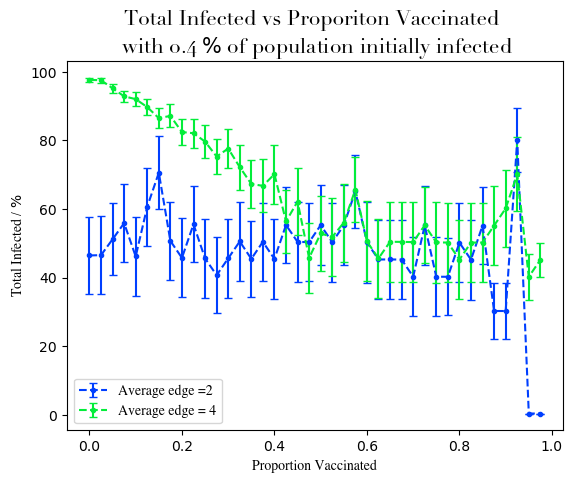

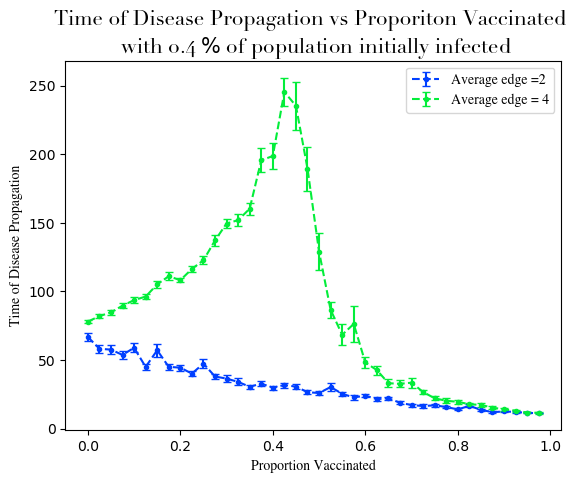

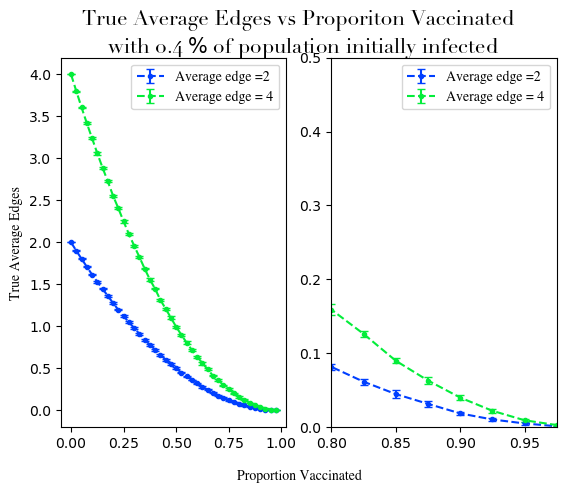

In [32]:

# Read in data
val_df = pd.read_csv('vaccineprop_e2e4_MR_constants.csv')
meanCumulative_df = pd.read_csv('vaccineprop_e2e4_MR_meanCumulative.csv')
meanRt_df = pd.read_csv('vaccineprop_e2e4_MR_meanRt.csv')
stdCumulative_df = pd.read_csv('vaccineprop_e2e4_MR_stdCumulative.csv')
stdRt_df = pd.read_csv('vaccineprop_e2e4_MR_stdRt.csv')


# avg edge = 2

ind = [i for i,v in enumerate(val_df['avg_edges']) if v == 2]
avgtimesteps_e2 = [val_df['avg_timesteps'][i] for i in ind]
stdtimesteps_e2 = [val_df['std_timesteps'][i] for i in ind]
avgedges_e2 = [val_df['Average Edges w Mit'][i] for i in ind]
stdedges_e2 = [val_df['Std Edges w Mit'][i] for i in ind]

mit = [0.025*i for i in range(len(avgedges_e2))]

cum_e2 = []
err_e2 = []
# Iterate over the columns in reverse order
for i in ind:
    for col in reversed(meanCumulative_df.columns):
        if pd.notna(meanCumulative_df.loc[i, col]):
            value = meanCumulative_df.loc[i, col]
            cum_e2.append(value)
            value = stdCumulative_df.loc[i, col]
            err_e2.append(value)
            break  # Exit the loop once a non-NaN value is foun
            
# avg edge = 3
ind = [i for i,v in enumerate(val_df['avg_edges']) if v == 3]
avgtimesteps_e3 = [val_df['avg_timesteps'][i] for i in ind]
stdtimesteps_e3 = [val_df['std_timesteps'][i] for i in ind]
avgedges_e3 = [val_df['Average Edges w Mit'][i] for i in ind]
stdedges_e3 = [val_df['Std Edges w Mit'][i] for i in ind]


cum_e3 = []
err_e3 = []
# Iterate over the columns in reverse order
for i in ind:
    for col in reversed(meanCumulative_df.columns):
        if pd.notna(meanCumulative_df.loc[i, col]):
            value = meanCumulative_df.loc[i, col]
            cum_e3.append(value)
            value = stdCumulative_df.loc[i, col]
            err_e3.append(value)
            break  # Exit the loop once a non-NaN value is foun
            
# Combining values
avgtime2 = [(avgtimesteps_e2[i]+avgtimesteps_e3[i])/2 for i in range(len(avgtimesteps_e2))]
N = len(stdtimesteps_e2)
stdtime2 = np.sqrt([(((stdtimesteps_e2[i])**2)/N)+(((stdtimesteps_e3[i])**2)/N) for i in range(len(avgtimesteps_e2))])
cumulative2 = [(cum_e2[i]+cum_e3[i])/2 for i in range(len(cum_e2))]
stdcumulative2 = np.sqrt([(((err_e2[i])**2)/N)+(((err_e3[i])**2)/N) for i in range(len(err_e2))])


# avg edge = 4
ind = [i for i,v in enumerate(val_df['avg_edges']) if v == 4]
avgtimesteps_e4 = [val_df['avg_timesteps'][i] for i in ind]
stdtimesteps_e4 = [val_df['std_timesteps'][i] for i in ind]
avgedges_e4 = [val_df['Average Edges w Mit'][i] for i in ind]
stdedges_e4 = [val_df['Std Edges w Mit'][i] for i in ind]

cum_e4 = []
err_e4 = []
# Iterate over the columns in reverse order
for i in ind:
    for col in reversed(meanCumulative_df.columns):
        if pd.notna(meanCumulative_df.loc[i, col]):
            value = meanCumulative_df.loc[i, col]
            cum_e4.append(value)
            value = stdCumulative_df.loc[i, col]
            err_e4.append(value)
            break  # Exit the loop once a non-NaN value is foun
            
# average edge = 5
ind = [i for i,v in enumerate(val_df['avg_edges']) if v == 5]
avgtimesteps_e5 = [val_df['avg_timesteps'][i] for i in ind]
stdtimesteps_e5 = [val_df['std_timesteps'][i] for i in ind]
avgedges_e5 = [val_df['Average Edges w Mit'][i] for i in ind]
stdedges_e5 = [val_df['Std Edges w Mit'][i] for i in ind]


cum_e5 = []
err_e5 = []
# Iterate over the columns in reverse order
for i in ind:
    for col in reversed(meanCumulative_df.columns):
        if pd.notna(meanCumulative_df.loc[i, col]):
            value = meanCumulative_df.loc[i, col]
            cum_e5.append(value)
            value = stdCumulative_df.loc[i, col]
            err_e5.append(value)
            break  # Exit the loop once a non-NaN value is foun

# Combining values
avgtime4 = [(avgtimesteps_e4[i]+avgtimesteps_e5[i])/2 for i in range(len(avgtimesteps_e4))]
N = len(stdtimesteps_e2)
stdtime4 = np.sqrt([(((stdtimesteps_e4[i])**2)/N)+(((stdtimesteps_e5[i])**2)/N) for i in range(len(avgtimesteps_e4))])
cumulative4 = [(cum_e4[i]+cum_e5[i])/2 for i in range(len(cum_e4))]
stdcumulative4 = np.sqrt([(((err_e4[i])**2)/N)+(((err_e5[i])**2)/N) for i in range(len(err_e4))])
            

plt.errorbar(mit, [(i*100)/5000 for i in cumulative2], [(i*100)/5000 for i in stdcumulative2], linestyle = 'dashed', capsize = 3, marker = '.', 
             label = "Average edge =2")
plt.errorbar(mit, [(i*100)/5000 for i in cumulative4], [(i*100)/5000 for i in stdcumulative4], linestyle = 'dashed', capsize = 3, marker = '.', 
             label = "Average edge = 4")

plt.xlabel('Proportion Vaccinated', **hfont)
plt.ylabel(r'Total Infected / $\%$', **hfont)
plt.legend(prop = font)
plt.title("Total Infected vs Proporiton Vaccinated \n with {} $\%$ of population initially infected".format(20*100/5000), fontsize = 15, **csfont)
plt.show()

# Plotting Average Edges against vaccination proportion
plt.errorbar(mit, avgtime2, stdtime2, linestyle = 'dashed', capsize = 3, marker = '.', 
             label = "Average edge =2")
plt.errorbar(mit, avgtime4, stdtime4, linestyle = 'dashed', capsize = 3, marker = '.', 
             label = "Average edge = 4")


plt.xlabel('Proportion Vaccinated', **hfont)
plt.ylabel('Time of Disease Propagation', **hfont)
plt.legend(prop = font)
plt.title("Time of Disease Propagation vs Proporiton Vaccinated \n with {} $\%$ of population initially infected".format(20*100/5000), fontsize = 15, **csfont)
plt.show()

# Plotting timesteps vs vaccination prop
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.errorbar(mit, avgedges_e2, stdedges_e2, linestyle = 'dashed', capsize = 3, marker = '.', 
             label = "Average edge =2")
ax1.errorbar(mit, avgedges_e4, stdedges_e4, linestyle = 'dashed', capsize = 3, marker = '.', 
             label = "Average edge = 4")

ax2.errorbar(mit, avgedges_e2, stdedges_e2, linestyle = 'dashed', capsize = 3, marker = '.', 
             label = "Average edge =2")
ax2.errorbar(mit, avgedges_e4, stdedges_e4, linestyle = 'dashed', capsize = 3, marker = '.', 
             label = "Average edge = 4")
ax2.set_xlim([0.8, 0.975])
ax2.set_ylim([0,0.5])

fig.text(x=0.4,y= 0, s='Proportion Vaccinated', **hfont)
ax1.set_ylabel('True Average Edges', **hfont)
ax1.legend(prop = font)
ax2.legend(prop = font)
plt.suptitle("True Average Edges vs Proporiton Vaccinated \n with {} $\%$ of population initially infected".format(20*100/5000), fontsize = 15, **csfont)

plt.show()


#Focussing on end of avgedges

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from matplotlib import font_manager
from scipy.optimize import curve_fit
from matplotlib.pyplot import cm
import statistics

plt.style.use('seaborn-v0_8-bright')
hfont = {'fontname': 'Times'}
csfont = {'fontname':'Didot'}
font = font_manager.FontProperties(family='Times',
                                   style='normal', size=10)

21
[2773.85, 3011.15, 2268.3, 2760.85, 2011.35, 3007.2, 2506.7, 2508.05, 2756.5, 2505.45, 2504.25, 2753.35, 2753.0, 3252.3, 2753.0, 3501.9, 5.15, 4001.25, 5.0, 5.0, 5.0]
[41.85, 23.55, 26.15, 18.95, 15.25, 15.4, 10.2, 11.75, 10.5, 8.95, 7.35, 6.2, 5.95, 5.55, 5.95, 5.4, 5.2, 5.25, 5.0, 5.0, 5.0]
[20.75996907005099, 8.274723719350328, 13.89159154990794, 8.744772874785196, 6.957578223551791, 5.897367833908705, 4.916138835776668, 7.711065186846073, 5.596051239372653, 4.006245124802026, 2.368099393362133, 1.6733200530681511, 0.998683343734455, 0.8255779474818965, 0.8870412083230169, 0.6805570473787206, 0.5231483637805969, 0.5501196042201808, 0.0, 0.0, 0.0]


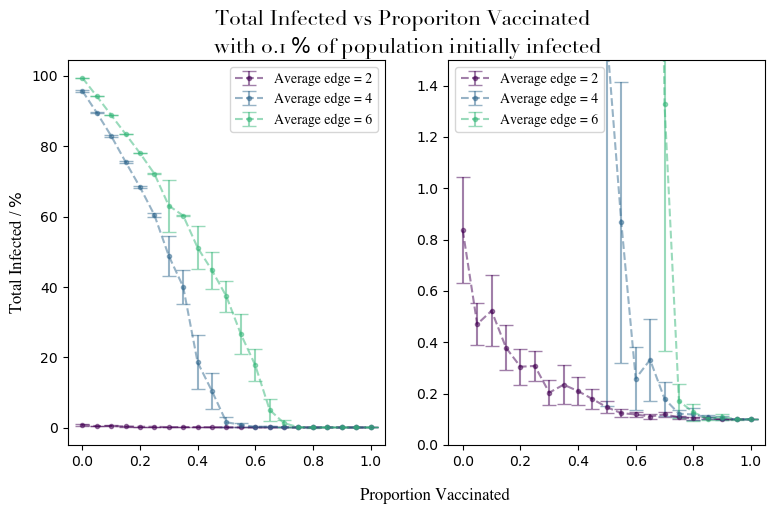

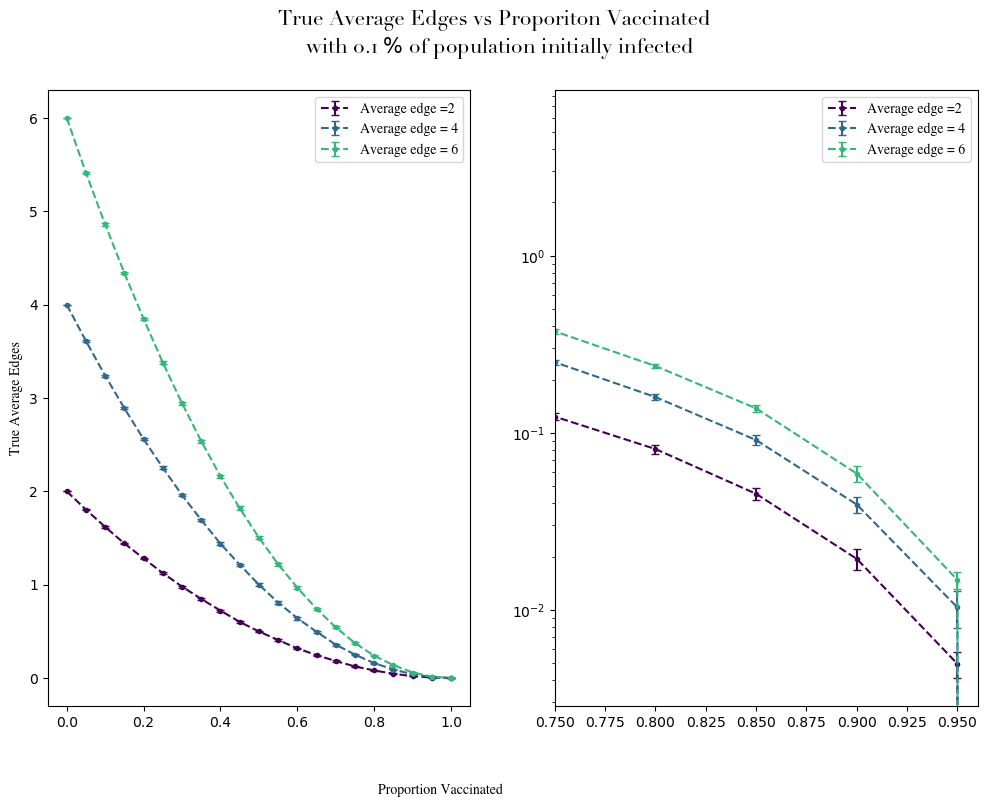

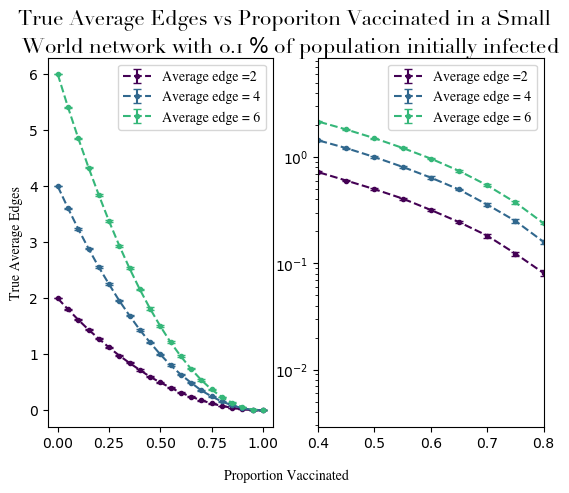

[ 0.48908841 12.84325597  1.01036784]
[[ 9.46191742e-05 -1.16499835e-05 -8.99028866e-05]
 [-1.16499835e-05  1.11240476e+00  2.52129870e-05]
 [-8.99028866e-05  2.52129870e-05  1.92891885e-04]]
[ 0.48908841 12.84325597  1.01036784]
[[ 9.46191742e-05 -1.16499835e-05 -8.99028866e-05]
 [-1.16499835e-05  1.11240476e+00  2.52129870e-05]
 [-8.99028866e-05  2.52129870e-05  1.92891885e-04]]


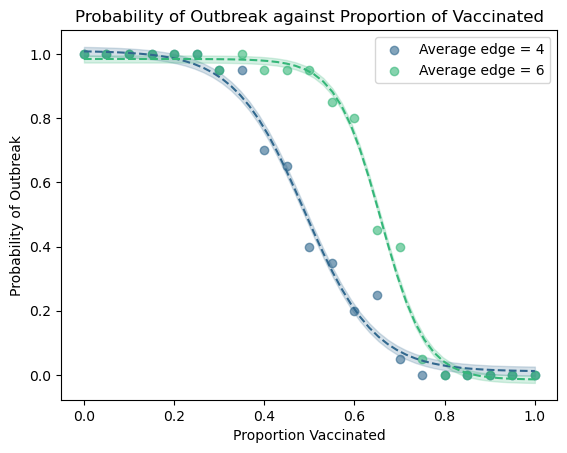

In [127]:
# Read in data
val_df = pd.read_csv('vaccineprop_noprop_fiveinit_1503_constants.csv')
meanCumulative_df = pd.read_csv('vaccineprop_noprop_fiveinit_1503_meanCumulative.csv')
meanRt_df = pd.read_csv('vaccineprop_noprop_fiveinit_1503_meanRt.csv')
stdCumulative_df = pd.read_csv('vaccineprop_noprop_fiveinit_1503_stdCumulative.csv')
stdRt_df = pd.read_csv('vaccineprop_noprop_fiveinit_1503_stdRt.csv')


# avg edge = 2

ind = [i for i,v in enumerate(val_df['avg_edges']) if v == 2]
avgtimesteps_e2 = [val_df['avg_timesteps'][i] for i in ind]
stdtimesteps_e2 = [val_df['std_timesteps'][i] for i in ind]
avgedges_e2 = [val_df['Average Edges w Mit'][i] for i in ind]
stdedges_e2 = [val_df['Std Edges w Mit'][i] for i in ind]
poutbreak2 = [val_df['Prob Outbreak'][i] for i in ind]
cum2 = [val_df['Final Infected'][i] for i in ind]
cumstd2 = [val_df['Final STD Infected'][i] for i in ind]

mit = [0.05*i for i in range(len(avgedges_e2))]
print(len(avgedges_e2, ))

cum_e2 = []
err_e2 = []
# Iterate over the columns in reverse order
for i in ind:
    for col in reversed(meanCumulative_df.columns):
        if pd.notna(meanCumulative_df.loc[i, col]):
            value = meanCumulative_df.loc[i, col]
            cum_e2.append(value)
            value = stdCumulative_df.loc[i, col]
            err_e2.append(value)
            break  # Exit the loop once a non-NaN value is foun
            
print(cum_e2)
print(cum2)
print(cumstd2)
# avg edge = 4
ind = [i for i,v in enumerate(val_df['avg_edges']) if v == 4]
avgtimesteps_e4 = [val_df['avg_timesteps'][i] for i in ind]
stdtimesteps_e4 = [val_df['std_timesteps'][i] for i in ind]
avgedges_e4 = [val_df['Average Edges w Mit'][i] for i in ind]
stdedges_e4 = [val_df['Std Edges w Mit'][i] for i in ind]
poutbreak4 = [val_df['Prob Outbreak'][i] for i in ind]
cum4 = [val_df['Final Infected'][i] for i in ind]
cumstd4 = [val_df['Final STD Infected'][i] for i in ind]

cum_e4 = []
err_e4 = []
# Iterate over the columns in reverse order
for i in ind:
    for col in reversed(meanCumulative_df.columns):
        if pd.notna(meanCumulative_df.loc[i, col]):
            value = meanCumulative_df.loc[i, col]
            cum_e4.append(value)
            value = stdCumulative_df.loc[i, col]
            err_e4.append(value)
            break  # Exit the loop once a non-NaN value is foun
            
            
# avg edge = 6
ind = [i for i,v in enumerate(val_df['avg_edges']) if v == 6]
avgtimesteps_e6 = [val_df['avg_timesteps'][i] for i in ind]
stdtimesteps_e6 = [val_df['std_timesteps'][i] for i in ind]
avgedges_e6 = [val_df['Average Edges w Mit'][i] for i in ind]
stdedges_e6 = [val_df['Std Edges w Mit'][i] for i in ind]
poutbreak6 = [val_df['Prob Outbreak'][i] for i in ind]
cum6 = [val_df['Final Infected'][i] for i in ind]
cumstd6 = [val_df['Final STD Infected'][i] for i in ind]

cum_e6 = []
err_e6 = []
# Iterate over the columns in reverse order
for i in ind:
    for col in reversed(meanCumulative_df.columns):
        if pd.notna(meanCumulative_df.loc[i, col]):
            value = meanCumulative_df.loc[i, col]
            cum_e6.append(value)
            value = stdCumulative_df.loc[i, col]
            err_e6.append(value)
            break  # Exit the loop once a non-NaN value is foun
            
   
fig, (ax1,ax2) = plt.subplots(1,2, sharex = True, figsize = (9,5))

ax1.errorbar(mit, [(i*100)/5000 for i in cum2], [(i*100)/10000 for i in cumstd2], linestyle = 'dashed', capsize = 5, alpha = 0.5, marker = '.', 
             label = "Average edge = 2", color = cm.viridis(0/3))
ax1.errorbar(mit, [(i*100)/5000 for i in cum4], [(i*100)/10000 for i in cumstd4], linestyle = 'dashed', capsize = 5, alpha = 0.5, marker = '.', 
             label = "Average edge = 4", color = cm.viridis(1/3))
ax1.errorbar(mit, [(i*100)/5000 for i in cum6], [(i*100)/10000 for i in cumstd6], linestyle = 'dashed', capsize = 5, alpha = 0.5, marker = '.', 
             label = "Average edge = 6", color = cm.viridis(2/3))

ax2.errorbar(mit, [(i*100)/5000 for i in cum2], [(i*100)/10000 for i in cumstd2], linestyle = 'dashed', capsize = 5, alpha = 0.5, marker = '.', 
             label = "Average edge = 2", color = cm.viridis(0/3))
ax2.errorbar(mit, [(i*100)/5000 for i in cum4], [(i*100)/10000 for i in cumstd4], linestyle = 'dashed', capsize = 5, alpha = 0.5, marker = '.', 
             label = "Average edge = 4", color = cm.viridis(1/3))
ax2.errorbar(mit, [(i*100)/5000 for i in cum6], [(i*100)/10000 for i in cumstd6], linestyle = 'dashed', capsize = 5, alpha = 0.5, marker = '.', 
             label = "Average edge = 6", color = cm.viridis(2/3))

ax2.set_ylim(0, 1.5)
fig.text(x=0.45,y= 0, s='Proportion Vaccinated', fontsize = 12, **hfont)
ax1.set_ylabel(r'Total Infected / $\%$', fontsize = 12, **hfont)
ax1.legend(prop = font)#, bbox_to_anchor=(0.85, -0.17),
          #ncol=2, fancybox=True, shadow=True, loc='center right')
ax2.legend(prop = font)
#plt.xlim(0.7775, 0.96)
#plt.ylim(0, 1)
plt.suptitle("Total Infected vs Proporiton Vaccinated \n with {} $\%$ of population initially infected".format(5*100/5000), fontsize = 15, **csfont)
plt.show()


# Plotting Average Edges against vaccination proportion
#plt.errorbar(mit, avgtime2, stdtime2, linestyle = 'dashed', capsize = 3, marker = '.', 
#             label = "Average edge =2")
#plt.errorbar(mit, avgtime4, stdtime4, linestyle = 'dashed', capsize = 3, marker = '.', 
#            label = "Average edge = 4")


#plt.xlabel('Proportion Vaccinated', **hfont)
#plt.ylabel('Time of Disease Propagation', **hfont)
#plt.legend(prop = font)
#plt.title("Time of Disease Propagation vs Proporiton Vaccinated \n with {} $\%$ of population initially infected".format(20*100/5000), fontsize = 15, **csfont)
#plt.show()

# Plotting timesteps vs vaccination prop
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (12,8))
ax1.errorbar(mit, avgedges_e2, stdedges_e2, linestyle = 'dashed', capsize = 3, marker = '.', 
             label = "Average edge =2", color = cm.viridis(0/3))
ax1.errorbar(mit, avgedges_e4, stdedges_e4, linestyle = 'dashed', capsize = 3, marker = '.', 
             label = "Average edge = 4", color = cm.viridis(1/3))
ax1.errorbar(mit, avgedges_e6, stdedges_e6, linestyle = 'dashed', capsize = 3, marker = '.', 
             label = "Average edge = 6", color = cm.viridis(2/3))

ax2.errorbar(mit, avgedges_e2, stdedges_e2, linestyle = 'dashed', capsize = 3, marker = '.', 
             label = "Average edge =2", color = cm.viridis(0/3))
ax2.errorbar(mit, avgedges_e4, stdedges_e4, linestyle = 'dashed', capsize = 3, marker = '.', 
             label = "Average edge = 4", color = cm.viridis(1/3))
ax2.errorbar(mit, avgedges_e6, stdedges_e6, linestyle = 'dashed', capsize = 3, marker = '.', 
             label = "Average edge = 6", color = cm.viridis(2/3))
ax2.set_xlim([0.75, 0.96])
ax2.set_yscale('log')

fig.text(x=0.4,y= 0, s='Proportion Vaccinated', **hfont)
ax1.set_ylabel('True Average Edges', **hfont)
ax1.legend(prop = font)
ax2.legend(prop = font)
plt.suptitle("True Average Edges vs Proporiton Vaccinated \n with {} $\%$ of population initially infected".format(5*100/5000), fontsize = 15, **csfont)

plt.show()



#Plotting probability of outbreak vs mitagation proportion
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.errorbar(mit, avgedges_e2, stdedges_e2, linestyle = 'dashed', capsize = 3, marker = '.', 
             label = "Average edge =2", color = cm.viridis(0/3))
ax1.errorbar(mit, avgedges_e4, stdedges_e4, linestyle = 'dashed', capsize = 3, marker = '.', 
             label = "Average edge = 4", color = cm.viridis(1/3))
ax1.errorbar(mit, avgedges_e6, stdedges_e6, linestyle = 'dashed', capsize = 3, marker = '.', 
             label = "Average edge = 6", color = cm.viridis(2/3))

ax2.errorbar(mit, avgedges_e2, stdedges_e2, linestyle = 'dashed', capsize = 3, marker = '.', 
             label = "Average edge =2", color = cm.viridis(0/3))
ax2.errorbar(mit, avgedges_e4, stdedges_e4, linestyle = 'dashed', capsize = 3, marker = '.', 
             label = "Average edge = 4", color = cm.viridis(1/3))
ax2.errorbar(mit, avgedges_e6, stdedges_e6, linestyle = 'dashed', capsize = 3, marker = '.', 
             label = "Average edge = 6", color = cm.viridis(2/3))
ax2.set_xlim([0.4, 0.8])
ax2.set_yscale('log')

fig.text(x=0.4,y= 0, s='Proportion Vaccinated', **hfont)
ax1.set_ylabel('True Average Edges', **hfont)
ax1.legend(prop = font)
ax2.legend(prop = font)
plt.suptitle("True Average Edges vs Proporiton Vaccinated in a Small \n World network with {} $\%$ of population initially infected".format(5*100/5000), fontsize = 15, **csfont)

plt.show()

#Prob outbreak vs mitprop
def sigmoid(x ,x0, k, b):
    y = -1 / (1 + np.exp(-k*(x-x0))) + b
    return (y)

popt1, pcov1 = curve_fit(sigmoid, mit, poutbreak4)
print(popt1)
print(pcov1)

xx = np.linspace(0, 1)
plt.plot(xx, sigmoid(xx, *popt1), color = cm.viridis(1/3), ls = '--')
plt.fill_between(xx, sigmoid(xx, *[popt1[i] if i != len(popt1)-1 else popt1[i] + np.sqrt(pcov1[i][i]) for i in range(len(popt1))]), 
                    sigmoid(xx, *[popt1[i] if i != len(popt1)-1 else popt1[i] - np.sqrt(pcov1[i][i]) for i in range(len(popt1))]), color = cm.viridis(1/3), alpha = 0.2)


popt2, pcov2 = curve_fit(sigmoid, mit, poutbreak6)
print(popt1)
print(pcov1)

xx = np.linspace(0, 1)
plt.plot(xx, sigmoid(xx, *popt2), color = cm.viridis(2/3), ls = '--')
plt.fill_between(xx, sigmoid(xx, *[popt2[i] if i != len(popt2)-1 else popt2[i] + np.sqrt(pcov2[i][i]) for i in range(len(popt2))]), 
                    sigmoid(xx, *[popt2[i] if i != len(popt2)-1 else popt2[i] - np.sqrt(pcov2[i][i]) for i in range(len(popt2))]), color = cm.viridis(2/3), alpha = 0.2)

#plt.scatter(mit, poutbreak2, color = cm.viridis(0/3), label = 'Average edge = 2', alpha = 0.6)
plt.scatter(mit, poutbreak4, color = cm.viridis(1/3), label = 'Average edge = 4', alpha = 0.6)
plt.scatter(mit, poutbreak6, color = cm.viridis(2/3), label = 'Average edge = 6', alpha = 0.6)

plt.ylabel("Probability of Outbreak")
plt.xlabel("Proportion Vaccinated")
plt.title("Probability of Outbreak against Proportion of Vaccinated")
plt.legend()


## More Specific Proportion

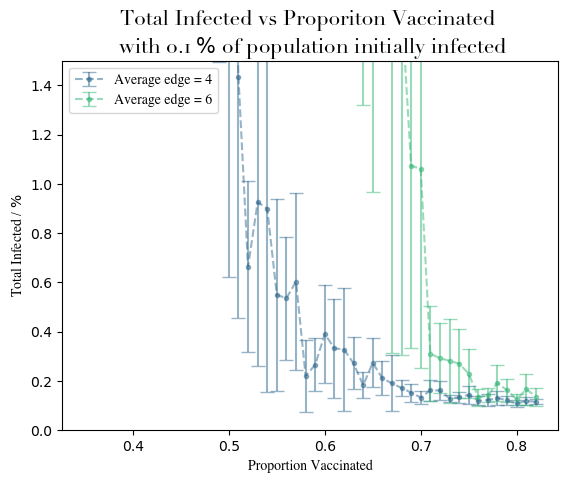

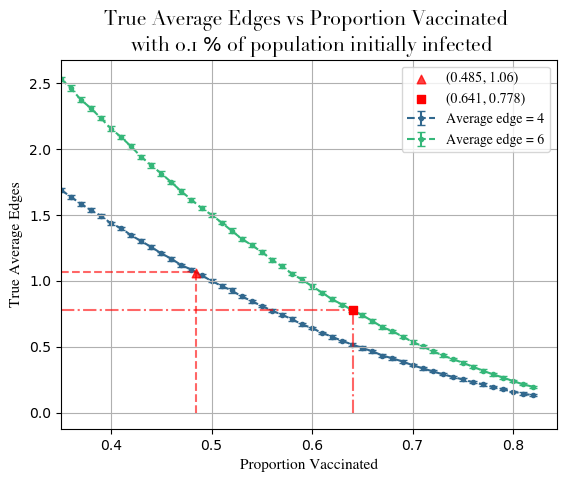

[ 0.48683257 22.02301034  0.98800493]
[[ 1.71862615e-05 -5.08414495e-04 -3.46479939e-05]
 [-5.08414495e-04  1.59423084e+00  2.17573780e-03]
 [-3.46479939e-05  2.17573780e-03  1.32479212e-04]]
[ 0.64468409 25.26172448  0.97543437]
[[ 1.93501791e-05  2.36311772e-04 -3.99150147e-05]
 [ 2.36311772e-04  3.17411831e+00 -1.03971518e-03]
 [-3.99150147e-05 -1.03971518e-03  1.69864214e-04]]


/var/folders/_z/js6kczb16373q18ffxtmcvxm0000gn/T/ipykernel_18561/1524943033.py:154: RuntimeWarning: overflow encountered in exp
  y = -1 / (1 + np.exp(-k*(x-x0))) + b


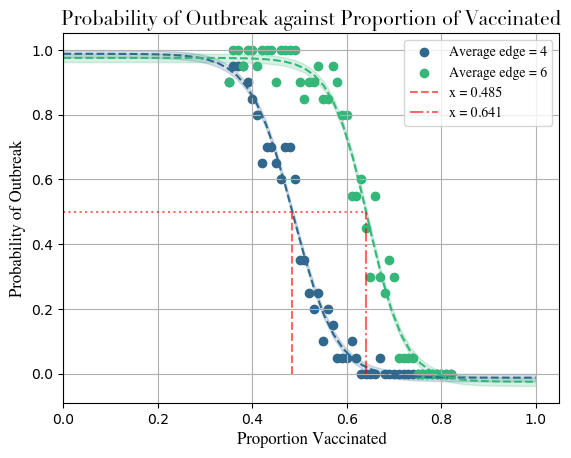

In [28]:
# Read in data
val_df = pd.read_csv('vaccprop_fiveinit_1503_sp_constants.csv')
meanCumulative_df = pd.read_csv('vaccprop_fiveinit_1503_sp_meanCumulative.csv')
meanRt_df = pd.read_csv('vaccprop_fiveinit_1503_sp_meanRt.csv')
stdCumulative_df = pd.read_csv('vaccprop_fiveinit_1503_sp_stdCumulative.csv')
stdRt_df = pd.read_csv('vaccprop_fiveinit_1503_sp_stdRt.csv')

# avg edge = 2

#ind = [i for i,v in enumerate(val_df['avg_edges']) if v == 2]
#avgtimesteps_e2 = [val_df['avg_timesteps'][i] for i in ind]
#stdtimesteps_e2 = [val_df['std_timesteps'][i] for i in ind]
#avgedges_e2 = [val_df['Average Edges w Mit'][i] for i in ind]
#stdedges_e2 = [val_df['Std Edges w Mit'][i] for i in ind]
#poutbreak2 = [val_df['Prob Outbreak'][i] for i in ind]


#mit = [0.4+(0.02*i) for i in range(len(avgedges_e2))]
#print(len(avgedges_e2))

#cum_e2 = []
#err_e2 = []
# Iterate over the columns in reverse order
#for i in ind:
#    for col in reversed(meanCumulative_df.columns):
#        if pd.notna(meanCumulative_df.loc[i, col]):
#            value = meanCumulative_df.loc[i, col]
#            cum_e2.append(value)
#            value = stdCumulative_df.loc[i, col]
#            err_e2.append(value)
#            break  # Exit the loop once a non-NaN value is foun
            
# avg edge = 4
ind = [i for i,v in enumerate(val_df['avg_edges']) if v == 4]
avgtimesteps_e4 = [val_df['avg_timesteps'][i] for i in ind]
stdtimesteps_e4 = [val_df['std_timesteps'][i] for i in ind]
avgedges_e4 = [val_df['Average Edges w Mit'][i] for i in ind]
stdedges_e4 = [val_df['Std Edges w Mit'][i] for i in ind]
poutbreak4 = [val_df['Prob Outbreak'][i] for i in ind]
cum4 = [val_df['Final Infected'][i] for i in ind]
cumstd4 = [val_df['Final STD Infected'][i] for i in ind]

mit = [0.35+(0.01*i) for i in range(len(avgedges_e4))]

cum_e4 = []
err_e4 = []
# Iterate over the columns in reverse order
for i in ind:
    for col in reversed(meanCumulative_df.columns):
        if pd.notna(meanCumulative_df.loc[i, col]):
            value = meanCumulative_df.loc[i, col]
            cum_e4.append(value)
            value = stdCumulative_df.loc[i, col]
            err_e4.append(value)
            break  # Exit the loop once a non-NaN value is foun
            
            
# avg edge = 6
ind = [i for i,v in enumerate(val_df['avg_edges']) if v == 6]
avgtimesteps_e6 = [val_df['avg_timesteps'][i] for i in ind]
stdtimesteps_e6 = [val_df['std_timesteps'][i] for i in ind]
avgedges_e6 = [val_df['Average Edges w Mit'][i] for i in ind]
stdedges_e6 = [val_df['Std Edges w Mit'][i] for i in ind]
poutbreak6 = [val_df['Prob Outbreak'][i] for i in ind]
cum6 = [val_df['Final Infected'][i] for i in ind]
cumstd6 = [val_df['Final STD Infected'][i] for i in ind]


cum_e6 = []
err_e6 = []
# Iterate over the columns in reverse order
for i in ind:
    for col in reversed(meanCumulative_df.columns):
        if pd.notna(meanCumulative_df.loc[i, col]):
            value = meanCumulative_df.loc[i, col]
            cum_e6.append(value)
            value = stdCumulative_df.loc[i, col]
            err_e6.append(value)
            break  # Exit the loop once a non-NaN value is foun
            
   

#plt.errorbar(mit, [(i*100)/5000 for i in cum2], [(i*100)/10000 for i in cumstd2], linestyle = 'dashed', capsize = 5, alpha = 0.5, marker = '.', 
#             label = "Average edge = 2", color = cm.viridis(0/3))
plt.errorbar(mit, [(i*100)/5000 for i in cum4], [(i*100)/10000 for i in cumstd4], linestyle = 'dashed', capsize = 5, alpha = 0.5, marker = '.', 
             label = "Average edge = 4", color = cm.viridis(1/3))
plt.errorbar(mit, [(i*100)/5000 for i in cum6], [(i*100)/10000 for i in cumstd6], linestyle = 'dashed', capsize = 5, alpha = 0.5, marker = '.', 
             label = "Average edge = 6", color = cm.viridis(2/3))
plt.ylim(0,1.5)
plt.xlabel('Proportion Vaccinated', **hfont)
plt.ylabel(r'Total Infected / $\%$', **hfont)
plt.legend(prop = font)
#plt.xlim(0.7775, 0.96)
plt.title("Total Infected vs Proporiton Vaccinated \n with {} $\%$ of population initially infected".format(5*100/5000), fontsize = 15, **csfont)
plt.show()


# Plotting Average Edges against vaccination proportion
#plt.errorbar(mit, avgtime2, stdtime2, linestyle = 'dashed', capsize = 3, marker = '.', 
#             label = "Average edge =2")
#plt.errorbar(mit, avgtime4, stdtime4, linestyle = 'dashed', capsize = 3, marker = '.', 
#            label = "Average edge = 4")


#plt.xlabel('Proportion Vaccinated', **hfont)
#plt.ylabel('Time of Disease Propagation', **hfont)
#plt.legend(prop = font)
#plt.title("Time of Disease Propagation vs Proporiton Vaccinated \n with {} $\%$ of population initially infected".format(20*100/5000), fontsize = 15, **csfont)
#plt.show()

# Plotting timesteps vs vaccination prop
#fig, (ax1,ax2) = plt.subplots(1,2)
#ax1.errorbar(mit, avgedges_e2, stdedges_e2, linestyle = 'dashed', capsize = 3, marker = '.', 
#             label = "Average edge =2", color = cm.viridis(0/3))
#ax1.errorbar(mit, avgedges_e4, stdedges_e4, linestyle = 'dashed', capsize = 3, marker = '.', 
             #label = "Average edge = 4", color = cm.viridis(1/3))
#ax1.errorbar(mit, avgedges_e6, stdedges_e6, linestyle = 'dashed', capsize = 3, marker = '.', 
             #label = "Average edge = 6", color = cm.viridis(2/3))

#ax2.errorbar(mit, avgedges_e2, stdedges_e2, linestyle = 'dashed', capsize = 3, marker = '.', 
#             label = "Average edge =2", color = cm.viridis(0/3))
# Error bars and lines plotting with lower zorder
plt.errorbar(mit, avgedges_e4, stdedges_e4, linestyle = 'dashed', capsize = 3, marker = '.', 
             label = "Average edge = 4", color = cm.viridis(1/3), zorder=1)
plt.errorbar(mit, avgedges_e6, stdedges_e6, linestyle = 'dashed', capsize = 3, marker = '.', 
             label = "Average edge = 6", color = cm.viridis(2/3), zorder=1)

plt.vlines(x = 0.4847, ymin = 0, ymax = val4, color = 'r', alpha = 0.6, ls = 'dashed', zorder=2)
plt.vlines(x = 0.6408, ymin = 0, ymax = val6, color = 'r', alpha = 0.6, ls = 'dashdot', zorder=2)
plt.hlines(y = val4, xmin = min(mit), xmax = 0.4847, color = 'r', alpha = 0.6, ls = 'dashed', zorder=2)
plt.hlines(y = val6, xmin = min(mit), xmax = 0.6408, color = 'r', alpha = 0.6, ls = 'dashdot', zorder=2)

# Scatter plots with higher zorder to ensure they are on top
plt.scatter(0.485, 1.06, marker = "^", s = 38, color = 'r', alpha = 0.75, label = '(0.485, 1.06)', zorder=3)
plt.scatter(0.641, 0.778, marker = 's', color = 'r', s = 33, label = '(0.641, 0.778)', zorder=3)

# Other plot settings
plt.legend(prop = font)
plt.xlim(min(mit))
plt.grid()
plt.xlabel('Proportion Vaccinated', fontsize = 11, **hfont)
plt.ylabel('True Average Edges', fontsize = 11, **hfont)
plt.title("True Average Edges vs Proportion Vaccinated \n with {} $\%$ of population initially infected".format(5*100/5000), fontsize = 14, **csfont)

plt.show()




#Prob outbreak vs mitprop

#Prob outbreak vs mitprop
def sigmoid(x ,x0, k, b):
    y = -1 / (1 + np.exp(-k*(x-x0))) + b
    return (y)

popt1, pcov1 = curve_fit(sigmoid, mit, poutbreak4)
print(popt1)
print(pcov1)

xx = np.linspace(0, 1)
plt.plot(xx, sigmoid(xx, *popt1), color = cm.viridis(1/3), ls = '--')
plt.fill_between(xx, sigmoid(xx, *[popt1[i] if i != len(popt1)-1 else popt1[i] + np.sqrt(pcov1[i][i]) for i in range(len(popt1))]), 
                    sigmoid(xx, *[popt1[i] if i != len(popt1)-1 else popt1[i] - np.sqrt(pcov1[i][i]) for i in range(len(popt1))]), color = cm.viridis(1/3), alpha = 0.2)


popt2, pcov2 = curve_fit(sigmoid, mit, poutbreak6)
print(popt2)
print(pcov2)

xx = np.linspace(0, 1)
plt.plot(xx, sigmoid(xx, *popt2), color = cm.viridis(2/3), ls = '--')
plt.fill_between(xx, sigmoid(xx, *[popt2[i] if i != len(popt2)-1 else popt2[i] + np.sqrt(pcov2[i][i]) for i in range(len(popt2))]), 
                    sigmoid(xx, *[popt2[i] if i != len(popt2)-1 else popt2[i] - np.sqrt(pcov2[i][i]) for i in range(len(popt2))]), color = cm.viridis(2/3), alpha = 0.2)

#plt.scatter(mit, poutbreak2, color = cm.viridis(0/3), label = 'Average edge = 2')
plt.scatter(mit, poutbreak4, color = cm.viridis(1/3), label = 'Average edge = 4')
plt.scatter(mit, poutbreak6, color = cm.viridis(2/3), label = 'Average edge = 6')
plt.grid()
plt.xlim(0)
plt.hlines(y = 0.5, xmin = 0, xmax = 0.6408, lw = 1.5, color = 'r', alpha = 0.6, ls = 'dotted')
plt.vlines(x = 0.4847, ymin = 0, ymax = 0.5, lw = 1.5,color = 'r', alpha = 0.6, ls = 'dashed', label = 'x = 0.485')
plt.vlines(x = 0.6408, ymin = 0, ymax = 0.5, lw = 1.5,color = 'r', alpha = 0.6, ls = 'dashdot', label = 'x = 0.641')

plt.ylabel("Probability of Outbreak", fontsize = 12, **hfont)
plt.xlabel("Proportion Vaccinated", fontsize = 12, **hfont)
plt.title("Probability of Outbreak against Proportion of Vaccinated",fontsize = 14, **csfont)
plt.legend(prop = font)

# Vaccinated Mitigation average edge

21
[2005.8, 2504.9, 2005.0, 1506.2, 3502.9, 3504.2, 2004.6, 3004.1, 1506.3, 2504.3, 2004.9, 2004.7, 2005.3, 2005.7, 4002.3, 2004.9, 2503.9, 2004.4, 1506.2, 2504.4, 2504.5]
[41.85, 23.55, 26.15, 18.95, 15.25, 15.4, 10.2, 11.75, 10.5, 8.95, 7.35, 6.2, 5.95, 5.55, 5.95, 5.4, 5.2, 5.25, 5.0, 5.0, 5.0]
[20.75996907005099, 8.274723719350328, 13.89159154990794, 8.744772874785196, 6.957578223551791, 5.897367833908705, 4.916138835776668, 7.711065186846073, 5.596051239372653, 4.006245124802026, 2.368099393362133, 1.6733200530681511, 0.998683343734455, 0.8255779474818965, 0.8870412083230169, 0.6805570473787206, 0.5231483637805969, 0.5501196042201808, 0.0, 0.0, 0.0]


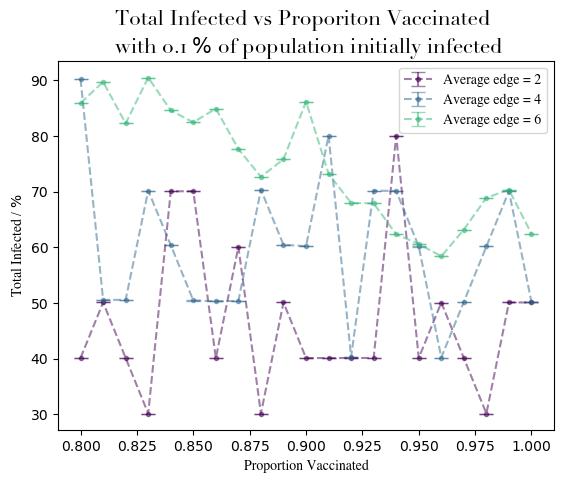

In [110]:
val_df = pd.read_csv("mitprop_vaccine1303_5initae_constants.csv")
meanCumulative_df = pd.read_csv("mitprop_vaccine1303_5initae_meanCumulative.csv")
stdCumulative_df = pd.read_csv("mitprop_vaccine1303_5initae_meanRt.csv")

ind = [i for i,v in enumerate(val_df['avg_edges']) if v == 2]
avgtimesteps_e2 = [val_df['avg_timesteps'][i] for i in ind]
stdtimesteps_e2 = [val_df['std_timesteps'][i] for i in ind]
#poutbreak2 = [val_df['Prob Outbreak'][i] for i in ind]
#cum2 = [val_df['Final Infected'][i] for i in ind]
#cumstd2 = [val_df['Final STD Infected'][i] for i in ind]

mit = [0.8+0.01*i for i in range(len(avgedges_e2))]
print(len(avgedges_e2, ))

cum_e2 = []
err_e2 = []
# Iterate over the columns in reverse order
for i in ind:
    for col in reversed(meanCumulative_df.columns):
        if pd.notna(meanCumulative_df.loc[i, col]):
            value = meanCumulative_df.loc[i, col]
            cum_e2.append(value)
            value = stdCumulative_df.loc[i, col]
            err_e2.append(value)
            break  # Exit the loop once a non-NaN value is foun
            
print(cum_e2)
print(cum2)
print(cumstd2)
# avg edge = 4
ind = [i for i,v in enumerate(val_df['avg_edges']) if v == 4]
avgtimesteps_e4 = [val_df['avg_timesteps'][i] for i in ind]
stdtimesteps_e4 = [val_df['std_timesteps'][i] for i in ind]
#poutbreak4 = [val_df['Prob Outbreak'][i] for i in ind]
#cum4 = [val_df['Final Infected'][i] for i in ind]
#cumstd4 = [val_df['Final STD Infected'][i] for i in ind]

cum_e4 = []
err_e4 = []
# Iterate over the columns in reverse order
for i in ind:
    for col in reversed(meanCumulative_df.columns):
        if pd.notna(meanCumulative_df.loc[i, col]):
            value = meanCumulative_df.loc[i, col]
            cum_e4.append(value)
            value = stdCumulative_df.loc[i, col]
            err_e4.append(value)
            break  # Exit the loop once a non-NaN value is foun
            
            
# avg edge = 6
ind = [i for i,v in enumerate(val_df['avg_edges']) if v == 6]
avgtimesteps_e6 = [val_df['avg_timesteps'][i] for i in ind]
stdtimesteps_e6 = [val_df['std_timesteps'][i] for i in ind]
#poutbreak6 = [val_df['Prob Outbreak'][i] for i in ind]
#cum6 = [val_df['Final Infected'][i] for i in ind]
#cumstd6 = [val_df['Final STD Infected'][i] for i in ind]

cum_e6 = []
err_e6 = []
# Iterate over the columns in reverse order
for i in ind:
    for col in reversed(meanCumulative_df.columns):
        if pd.notna(meanCumulative_df.loc[i, col]):
            value = meanCumulative_df.loc[i, col]
            cum_e6.append(value)
            value = stdCumulative_df.loc[i, col]
            err_e6.append(value)
            break  # Exit the loop once a non-NaN value is foun
            
   
plt.errorbar(mit, [(i*100)/5000 for i in cum_e2], [(i*100)/10000 for i in err_e2], linestyle = 'dashed', capsize = 5, alpha = 0.5, marker = '.', 
             label = "Average edge = 2", color = cm.viridis(0/3))
plt.errorbar(mit, [(i*100)/5000 for i in cum_e4], [(i*100)/10000 for i in err_e4], linestyle = 'dashed', capsize = 5, alpha = 0.5, marker = '.', 
             label = "Average edge = 4", color = cm.viridis(1/3))
plt.errorbar(mit, [(i*100)/5000 for i in cum_e6], [(i*100)/10000 for i in err_e6], linestyle = 'dashed', capsize = 5, alpha = 0.5, marker = '.', 
             label = "Average edge = 6", color = cm.viridis(2/3))

plt.xlabel('Proportion Vaccinated', **hfont)
plt.ylabel(r'Total Infected / $\%$', **hfont)
plt.legend(prop = font)
#plt.xlim(0.7775, 0.96)
plt.title("Total Infected vs Proporiton Vaccinated \n with {} $\%$ of population initially infected".format(5*100/5000), fontsize = 15, **csfont)
plt.show()